In [70]:
import os, sys
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [71]:
# Read data from xlsx file
data_dir_path = "./project1.xlsx"
df = pd.read_excel(data_dir_path)

In [143]:
df.head(4)

,REF_DATE,GEO,GDPrealVALUE,GHGVALUE,industrialEnergyuse
0,1997,Canada,1175433.7,682298.100156,2202317.0
1,1998,Canada,1220257.6,688614.028520,2144147.0
2,1999,Canada,1280394.9,700082.199732,2175238.0
3,2000,Canada,1348207.8,724923.602865,2267257.0


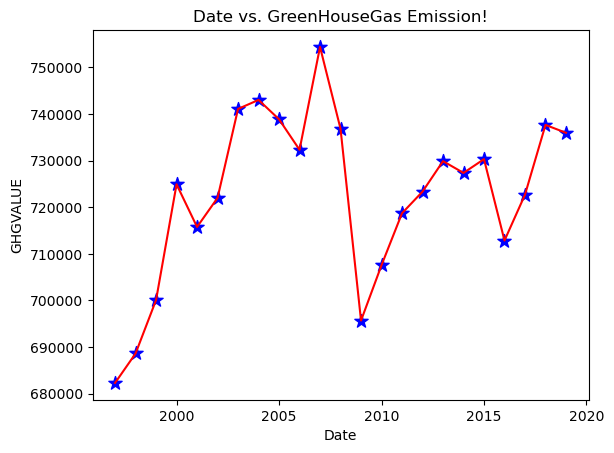

In [129]:
# Filter the dataframe based on the "GEO" column 


df_canada = df[df["GEO"] == "Canada"] # df_canada is the new filtered dataframe obtained from df which only contains the data for Canada.
# df_NFL = df[df["GEO"]== "Newfoundland and Labrador"]

X = df_canada['REF_DATE']
Y = df_canada['GHGVALUE']

# Plot the line with a separate color
plt.plot(X, Y, linestyle='-', color='red', label='Line')


# Plot the points with a different color
plt.scatter(X, Y, marker='*', color='blue', s=100, label='Data Points')
plt.xlabel("Date")
plt.ylabel("GHGVALUE")
plt.title("Date vs. GreenHouseGas Emission!")
plt.show()

In [115]:
df_canada.describe()

,REF_DATE,GDPrealVALUE,GHGVALUE,industrialEnergyuse
count,23.00000,2.300000e+01,23.000000,2.300000e+01
mean,2008.00000,1.596506e+06,722708.684299,2.440181e+06
std,6.78233,2.297421e+05,18183.835914,2.571006e+05
min,1997.00000,1.175434e+06,682298.100156,2.144147e+06
25%,2002.50000,1.428308e+06,714310.674866,2.235675e+06
50%,2008.00000,1.611907e+06,724923.602865,2.320884e+06
75%,2013.50000,1.778418e+06,736405.020152,2.653488e+06
max,2019.00000,1.985076e+06,754402.033660,2.966029e+06


In [169]:
# number of data on hand
print(f"Number of samples/data = \033[91m{len(df)}\033[0m")

Number of samples/data = 322


In [170]:
# Clean data for the lines with no data for some of the features.
df.dropna(inplace=True) # Cleans the features which have one or more missing data for its columns/attributes. 
# Note: it does the edits on the original dataframe (df in this case.)
print(f"NUM of features after missing data samples is: \033[91m{len(df)}\033[0m")

NUM of features after missing data samples is: 274


Geo-location names: 

['Canada' 'Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon']

# of data in GEO=Yukon is: 21


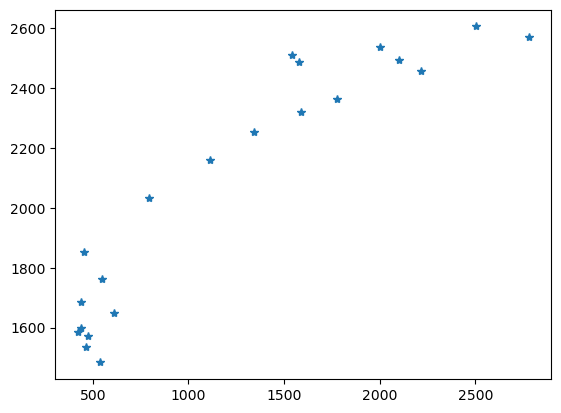

In [171]:
# Filter based on the Geo-location
unique_names = df["GEO"].unique()
print(f"Geo-location names: \n\n{unique_names}")
geo ='Yukon'

filtered_df = df[df["GEO"] == geo]
print(f"\n# of data in GEO={geo} is: {len(filtered_df)}")
# Trying to understand the correlations between the data variables (e.g. GHGVALUE & industrialEnergyuse)
x = filtered_df["industrialEnergyuse"].values
# y = filtered_df["GHGVALUE"].values
y = filtered_df["GDPrealVALUE"].values
# z = filtered_df["REF_DATE"].values

plt.plot(x, y, "*")
plt.show()


In [172]:
# Checkning if there is any features with no values for each of each columns.

# (1) Get the column names
column_list = list(df.columns)
print(column_list)
# (2) Count the number of no values for each of the columns
def check_no_value(df, column_name):
    count_noval = df[column_name].isnull().sum()
    return count_noval

for col_name in column_list:
    count_noval = check_no_value(df=df, column_name=col_name)
    print(f"NUM of null values in {col_name} = {count_noval}")

['REF_DATE', 'GEO', 'GDPrealVALUE', 'GHGVALUE', 'industrialEnergyuse']
NUM of null values in REF_DATE = 0
NUM of null values in GEO = 0
NUM of null values in GDPrealVALUE = 0
NUM of null values in GHGVALUE = 0
NUM of null values in industrialEnergyuse = 0


In [173]:
infinite_values = np.isinf(df["REF_DATE"]).sum()
print(infinite_values)

0


In [183]:
#unit root testing - augmented-dickey-fuller-test

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as inline

X = df["GDPrealVALUE"].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
    
    

ADF Statistic: -2.842891
p-value: 0.052403
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.572
Failed to Reject Ho - Time Series is Non-Stationary


In [186]:
# Take the first difference
df['FirstDifference_GDPrealVALUE'] = df['GDPrealVALUE'].diff()
print("Original DataFrame:")
print(df)


X = df["FirstDifference_GDPrealVALUE"].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Original DataFrame:
     REF_DATE     GEO  GDPrealVALUE       GHGVALUE  industrialEnergyuse  \
0        1997  Canada     1175433.7  682298.100156            2202317.0   
1        1998  Canada     1220257.6  688614.028520            2144147.0   
2        1999  Canada     1280394.9  700082.199732            2175238.0   
3        2000  Canada     1348207.8  724923.602865            2267257.0   
4        2001  Canada     1369511.8  715765.761364            2146829.0   
..        ...     ...           ...            ...                  ...   
271      2015   Yukon        2320.2     530.083190               1587.0   
272      2016   Yukon        2487.6     528.484551               1576.0   
273      2017   Yukon        2536.9     564.451134               2001.0   
274      2018   Yukon        2606.5     645.008036               2505.0   
275      2019   Yukon        2572.5     691.936968               2779.0   

     FirstDifference_GDPrealVALUE  
0                             NaN  
1      

MissingDataError: exog contains inf or nans

In [59]:
#want to know if time variable is a column
df.columns
#!! The time variable is counted as number of rows !!! 
df.index

#Do we have NaN in the data?
df.isnull()

,GEO,GDPrealVALUE,GHGVALUE,industrialEnergyuse
REF_DATE,,,,
1997,False,False,False,False
1998,False,False,False,False
1999,False,False,False,False
2000,False,False,False,False
2001,False,False,False,False
...,...,...,...,...
2015,False,False,True,False
2016,False,False,True,False
2017,False,False,True,False


In [57]:
#want to set the time as a variable

df.set_index('REF_DATE', inplace=True)
df.head()

KeyError: "None of ['REF_DATE'] are in the columns"

In [51]:
#calling a column aand row
df.iloc[0:5, 2]

0    1175433.7
1    1220257.6
2    1280394.9
3    1348207.8
4    1369511.8
Name: GDPrealVALUE, dtype: float64

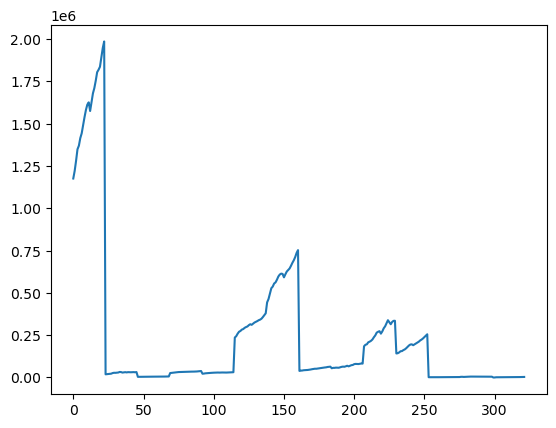

In [29]:
plt.plot(df["GDPrealVALUE"])


In [46]:
df['GDPrealVALUE']
df['GEO']
df['REF_DATE']
df['GHGVALUE']
df['industrialEnergyuse']

0      2202317.0
1      2144147.0
2      2175238.0
3      2267257.0
4      2146829.0
         ...    
317       1536.0
318       2168.0
319       2057.0
320       1655.0
321       1475.0
Name: industrialEnergyuse, Length: 322, dtype: float64

In [ ]:
df = df.rename(columns={'W':'Ali'})
df = df.rename(index={'A': 'Javad', 'D':'Yalda'})


#calling a column aand row
df.iloc[0:3, 2]


#changing a certain data 
df.loc['Yalda', 'Mahshid'] = 55